In [1]:
import sys
import pandas as pd
import statsmodels.formula.api as smf
import itertools

In [2]:
%matplotlib inline

# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats

# Load data
# Put real_estate.csv in the same folder as this file
df = pd.read_csv('store_sales.csv')
display(df)

,sales,area,walking_time,competing_stores,population_density,parking,dining,main_street
0,87.6,58.121727,6.941218,2,11.966089,0,0,0
1,92.0,53.186809,5.700467,5,11.127574,0,1,1
2,96.3,55.668847,4.500544,3,16.835161,1,0,0
3,85.1,44.352024,5.749738,4,39.470058,0,1,0
4,86.4,46.541696,8.016232,2,17.731017,0,0,0
...,...,...,...,...,...,...,...,...
494,84.7,52.010861,11.387535,3,51.603845,1,1,0
495,72.2,44.100876,14.949785,3,23.235896,1,0,0
496,80.7,48.662116,14.808499,3,56.799533,1,1,0
497,96.1,55.478438,8.929852,2,39.143037,1,1,0


In [3]:
model = 'sales ~ area + walking_time + competing_stores + population_density + parking + dining + main_street'
results = smf.ols(model, df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     559.0
Date:                Fri, 22 Nov 2024   Prob (F-statistic):          2.64e-229
Time:                        18:05:21   Log-Likelihood:                -1426.1
No. Observations:                 499   AIC:                             2868.
Df Residuals:                     491   BIC:                             2902.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             97.1950      2.159     45.020      0.000      92.953     101.437
area                   0.2428      0.039      6.243      0.000       0.166       0.319
walking_time          -1.6635      0.041    -40.189      0.000      -1.745      -1.582
competing_stores      -5.0962      0.196    -25.966      0.000      -5.482      -4.711
population_density     0.0027      0.004      0.684      0.494      -0.005       0.010
parking                3.1535      0.389      8.109      0.000       2.389       3.918
dining                 5.0086      0.386     12.986      0.000       4.251       5.766
main_street           16.7119      0.483     34.610      0.000      15.763      17.661
==============================================================================
Omnibus:                       20.177   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.607
Skew:                           0.254   Prob(JB):                     1.12e-08
Kurtosis:                       4.226   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 5. Review of Settings (Verification of Settings)

　Residual plot

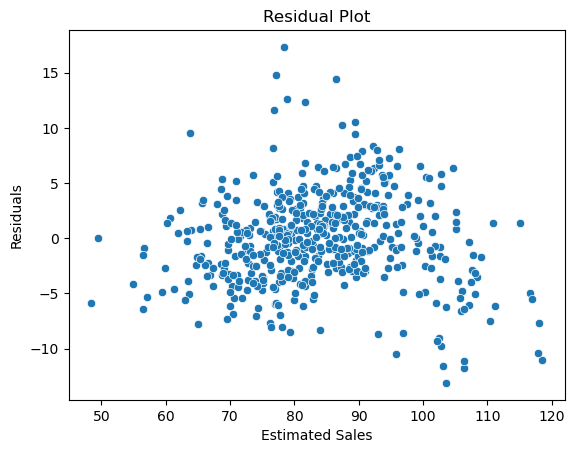

In [5]:
#　Residual plot
sns.scatterplot(x=results.fittedvalues, y=df['sales']-results.fittedvalues)
plt.xlabel('Estimated Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# The stratification can also be done as follows.
# Residual plot stratified by structure
# sns.scatterplot(x=results.fittedvalues, y=df['price']-results.fittedvalues, hue=df['structure'])

Q-Q plot

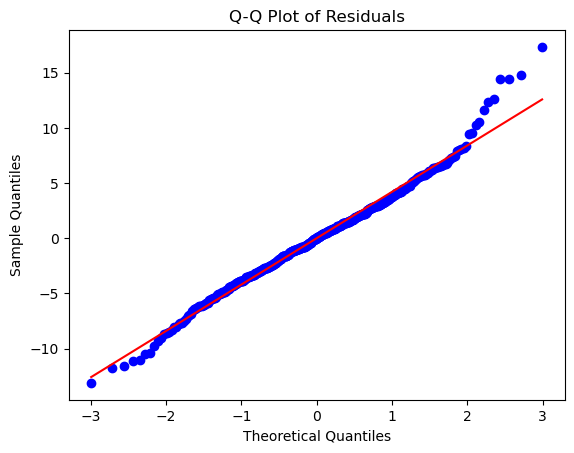

In [ ]:
stats.probplot(df['sales'] - results.fittedvalues, dist='norm', plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

Histogram of residual

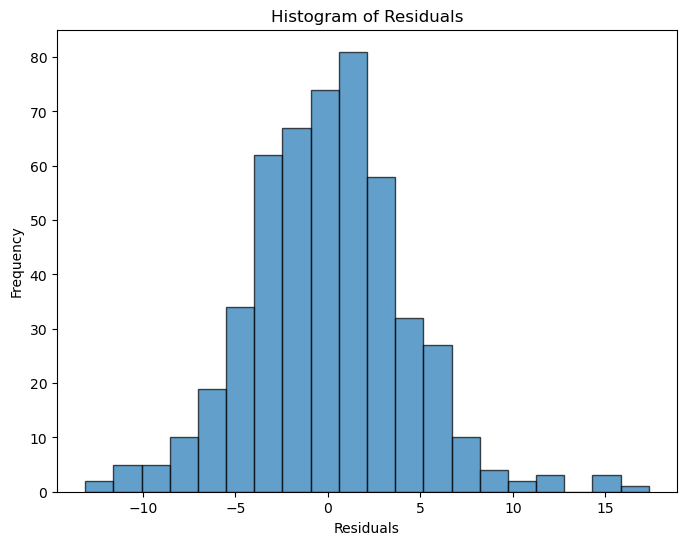

In [7]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = df['sales'] - results.fittedvalues

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


Shapiro-Wilk normality test

In [8]:
stats.shapiro(df['sales']-results.fittedvalues)

ShapiroResult(statistic=0.98660568314871, pvalue=0.00015077287498812476)

# 6. Review of Settings (Revision of the Regression Equation)

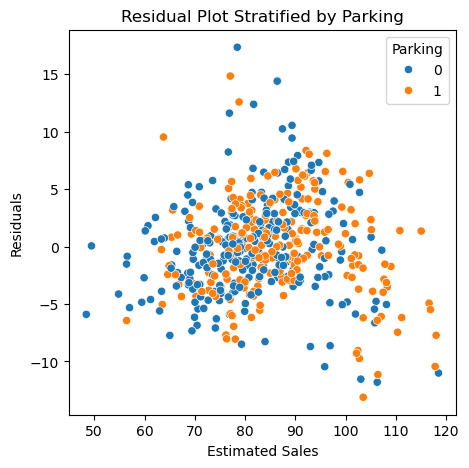

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residual plot with stratification by parking (x5)
plt.figure(figsize=(5, 5))
sns.scatterplot(x=results.fittedvalues, y=df['sales'] - results.fittedvalues, hue=df['parking'])
plt.title("Residual Plot Stratified by Parking")
plt.xlabel("Estimated Sales")
plt.ylabel("Residuals")
plt.legend(title='Parking')
plt.show()

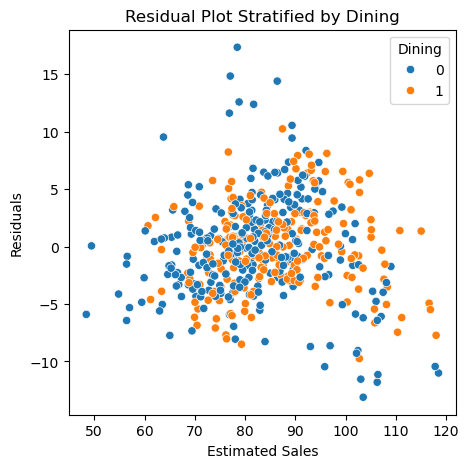

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residual plot with stratification by parking (x5)
plt.figure(figsize=(5, 5))
sns.scatterplot(x=results.fittedvalues, y=df['sales'] - results.fittedvalues, hue=df['dining'])
plt.title("Residual Plot Stratified by Dining")
plt.xlabel("Estimated Sales")
plt.ylabel("Residuals")
plt.legend(title='Dining')
plt.show()

<Figure size 500x500 with 0 Axes>

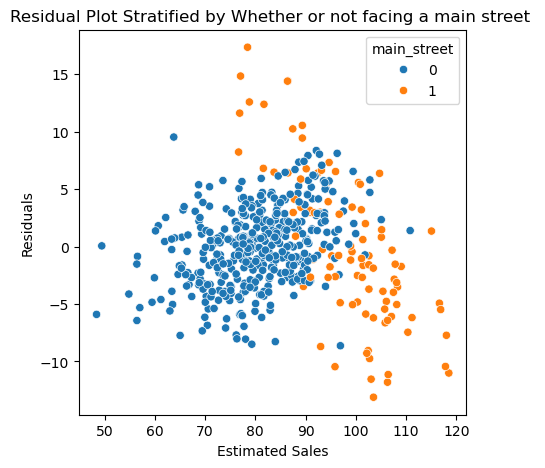

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residual plot with stratification by parking (x5)
plt.figure(figsize=(5, 5))
sns.scatterplot(x=results.fittedvalues, y=df['sales'] - results.fittedvalues, hue=df['main_street'])
plt.xlabel('Estimated Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot Stratified by Whether or not facing a main street ')
plt.show()

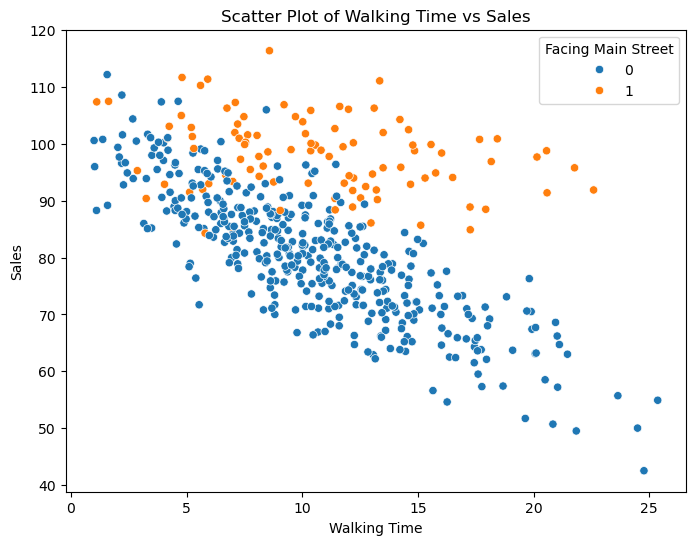

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='walking_time', y='sales', hue='main_street')
plt.title('Scatter Plot of Walking Time vs Sales')
plt.xlabel('Walking Time')
plt.ylabel('Sales')
plt.legend(title='Facing Main Street')
plt.show()

In [33]:
model = 'sales ~ area  + walking_time + competing_stores  + population_density + parking + dining + main_street + walking_time * main_street'
results = smf.ols(model, df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1050.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          8.91e-303
Time:                        19:22:34   Log-Likelihood:                -1250.4
No. Observations:                 499   AIC:                             2519.
Df Residuals:                     490   BIC:                             2557.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   98.3450      1.521     64.679      0.000      95.357     101.333
area                         0.2870      0.027     10.460      0.000       0.233       0.341
walking_time                -1.9780      0.032    -61.151      0.000      -2.042      -1.914
competing_stores            -5.0840      0.138    -36.802      0.000      -5.355      -4.813
population_density          -0.0009      0.003     -0.334      0.739      -0.006       0.004
parking                      3.4025      0.274     12.420      0.000       2.864       3.941
dining                       4.9956      0.271     18.401      0.000       4.462       5.529
main_street                 -0.5358      0.842     -0.636      0.525      -2.190       1.119
walking_time:main_street     1.6201      0.072     22.383      0.000       1.478       1.762
==============================================================================
Omnibus:                        4.099   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                3.947
Skew:                          -0.173   Prob(JB):                        0.139
Kurtosis:                       3.265   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Define functions
# Function to get a list of regression equations without interaction terms
def get_model_list_interaction_none(descriptors, name): 
    models = []
    for n in range(1, len(descriptors)+1):
        for comb in itertools.combinations(descriptors, n):
            model_description = name + ' ~ ' + ' + '.join(comb)
            models.append(model_description)
            
    return models

# Function to get a list of regression equations containing one interaction term
def get_model_list_interaction_one(descriptors, name):
    models = []
    for n in range(1, len(descriptors)+1):
        for comb in itertools.combinations(descriptors, n):
            model_description = name + ' ~ ' + ' + '.join(comb)
            models.append(model_description)     
            
            interactions = []
            for interaction in itertools.combinations(comb, 2):
                interactions.append(' * '.join(interaction))
            for interaction in interactions:
                model_description = name + ' ~ ' + ' + '.join(comb) + ' + ' + interaction
                models.append(model_description)
                
    return models

# Function to get a list of regression equations including all interaction terms
def get_model_list_interaction_all(descriptors, name):
    models = []
    for n in range(1, len(descriptors)+1):
        for comb in itertools.combinations(descriptors, n):
            interactions = []
            for interaction in itertools.combinations(comb, 2):
                interactions.append(' * '.join(interaction))
            for m in range(len(interactions)+1): 
                for comb_interactions in itertools.combinations(interactions, m):
                    if len(comb_interactions)==0:
                        model_description = name + ' ~ ' + ' + '.join(comb)
                    else:
                        model_description = name + ' ~ ' + ' + '.join(comb) + ' + ' + ' + '.join(comb_interactions)
                    models.append(model_description)
                    
    return models

def get_model_list(descriptors, target, interaction='none'):
    if interaction=='none':
        models = get_model_list_interaction_none(descriptors, target)
    elif interaction=='one':
        models = get_model_list_interaction_one(descriptors, target)
    elif interaction=='all':
        models = get_model_list_interaction_all(descriptors, target)
    else:
        interactions = ['none', 'one', 'all']
        if interaction not in interactions:
            raise ValueError(f"interaction must be one of {', '.join(interactions)}")
    
    return models

In [14]:
min_ec = sys.float_info.max
opt_model = ''
opt_results = None
# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Redefine the descriptors list to match the cleaned column names
descriptors = ['area', 'walking_time', 'competing_stores', 'population_density', 'parking', 'dining', 'main_street', 'walking_time * main_street']
target = 'sales'

# Generate models using the updated descriptors
models = get_model_list(descriptors, target)

print('BIC\t formula')

# Run the analysis with cleaned column names
for model in models:
    # Ensure population_density is included in each model formula
    results = smf.ols(formula=model, data=df).fit()
    ec = results.bic
    print('{:.0f}\t {}'.format(ec, model))

    if ec < min_ec:
        min_ec = ec
        opt_model = model
        opt_results = results

print('\nOptimum model:', opt_model)
display(opt_results.summary())

BIC	 formula
3953	 sales ~ area
3732	 sales ~ walking_time
3876	 sales ~ competing_stores
3959	 sales ~ population_density
3936	 sales ~ parking
3947	 sales ~ dining
3774	 sales ~ main_street
3294	 sales ~ walking_time * main_street
3729	 sales ~ area + walking_time
3875	 sales ~ area + competing_stores
3959	 sales ~ area + population_density
3936	 sales ~ area + parking
3946	 sales ~ area + dining
3776	 sales ~ area + main_street
3282	 sales ~ area + walking_time * main_street
3567	 sales ~ walking_time + competing_stores
3738	 sales ~ walking_time + population_density
3729	 sales ~ walking_time + parking
3720	 sales ~ walking_time + dining
3381	 sales ~ walking_time + main_street
3294	 sales ~ walking_time + walking_time * main_street
3882	 sales ~ competing_stores + population_density
3849	 sales ~ competing_stores + parking
3861	 sales ~ competing_stores + dining
3689	 sales ~ competing_stores + main_street
2914	 sales ~ competing_stores + walking_time * main_street
3943	 sales ~ p

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1202.
Date:                Fri, 22 Nov 2024   Prob (F-statistic):          2.62e-304
Time:                        18:17:09   Log-Likelihood:                -1250.4
No. Observations:                 499   AIC:                             2517.
Df Residuals:                     491   BIC:                             2551.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   98.2434      1.488     66.007      0.000      95.319     101.168
area                         0.2877      0.027     10.518      0.000       0.234       0.341
competing_stores            -5.0800      0.138    -36.945      0.000      -5.350      -4.810
parking                      3.3954      0.273     12.442      0.000       2.859       3.932
dining                       5.0011      0.271     18.473      0.000       4.469       5.533
walking_time                -1.9779      0.032    -61.206      0.000      -2.041      -1.914
main_street                 -0.5150      0.839     -0.614      0.540      -2.164       1.134
walking_time:main_street     1.6187      0.072     22.422      0.000       1.477       1.761
==============================================================================
Omnibus:                        4.011   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                3.861
Skew:                          -0.170   Prob(JB):                        0.145
Kurtosis:                       3.266   Cond. No.                         573.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. Review of Settings (Verification of the Settings)

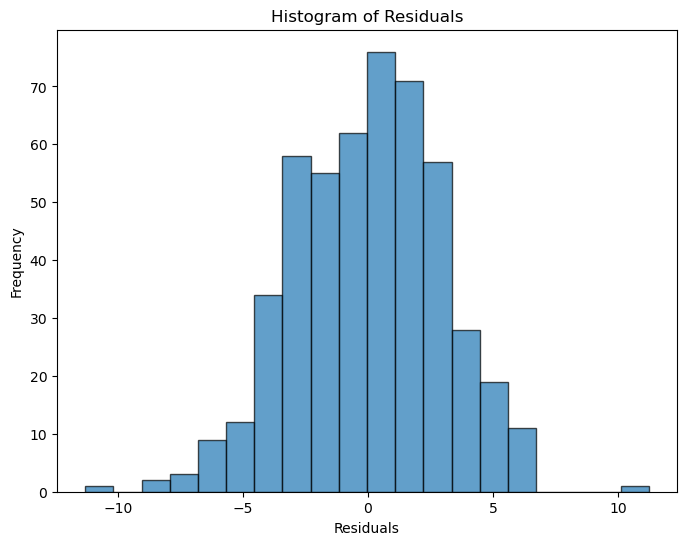

In [15]:
# Calculate residuals
residuals = df['sales'] - results.fittedvalues

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

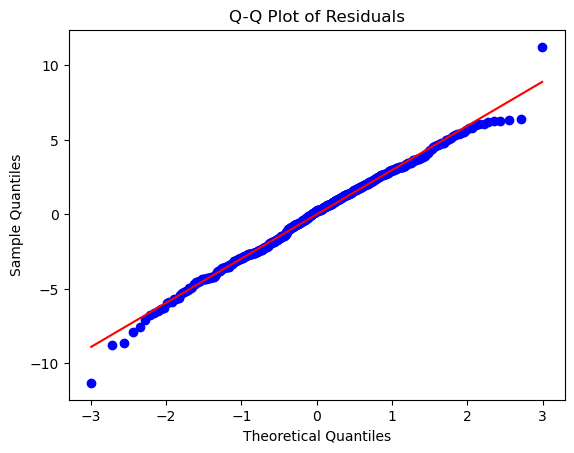

In [16]:
stats.probplot(df['sales'] - results.fittedvalues, dist='norm', plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

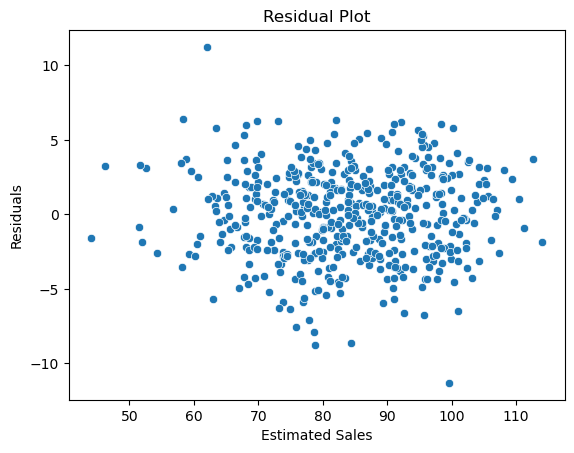

In [17]:
sns.scatterplot(x=results.fittedvalues, y=df['sales']-results.fittedvalues)
plt.xlabel('Estimated Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [49]:
stats.shapiro(df['sales']-results.fittedvalues)

ShapiroResult(statistic=0.9944355985982737, pvalue=0.06648082318313216)

여기에도 population density에 대한 coefficient가 없음.